## Dataset

In [20]:
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
# from google.colab import files
from tensorflow.keras.preprocessing import  image_dataset_from_directory
import tensorflow as tf


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [21]:
# !pip install -q kaggle
# files.upload()
# # !rm -rf ~/.kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list
# ! kaggle competitions download -c dogs-vs-cats
# ! unzip /content/dogs-vs-cats.zip
# ! unzip /content/test1.zip
# ! unzip /content/train.zip
# ! mkdir /content/train/kit
# ! mv /content/train/cat* /content/train/kit/
# ! mkdir /content/train/dod
# ! mv /content/train/dog* /content/train/dod/

## Convnet

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(
    train_images, train_labels,
    epochs=5,
    batch_size=64,
    validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 6s 7ms/step - loss: 0.3655 - accuracy: 0.9158 - val_loss: 0.1056 - val_accuracy: 0.9690
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0874 - accuracy: 0.9749 - val_loss: 0.0761 - val_accuracy: 0.9773
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0631 - accuracy: 0.9820 - val_loss: 0.0944 - val_accuracy: 0.9722
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0528 - accuracy: 0.9845 - val_loss: 0.1000 - val_accuracy: 0.9735
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0445 - accuracy: 0.9875 - val_loss: 0.0791 - val_accuracy: 0.9821


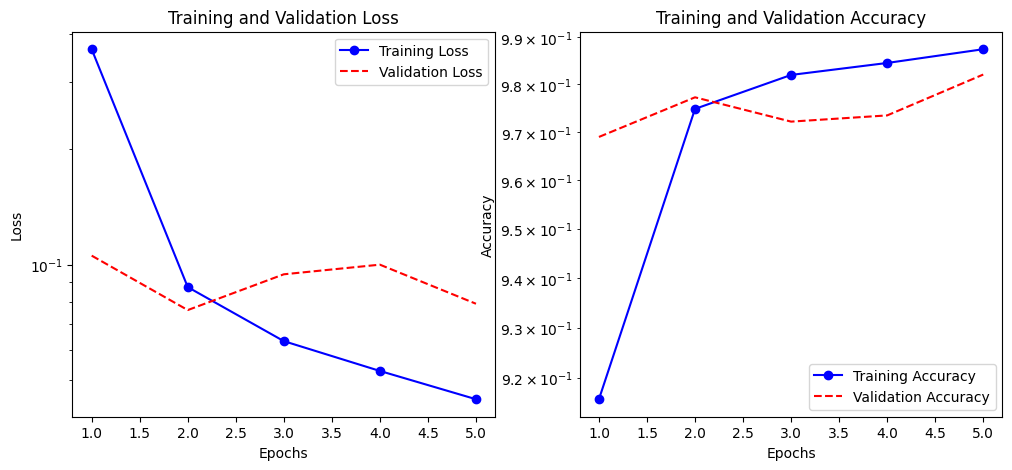

In [23]:
def plot_network_outputs(history):
    # Extract history data
    history_dict = history.history

    # Extract loss and accuracy
    loss = history_dict['loss']
    val_loss = history_dict.get('val_loss')  # Use .get() in case it's not present
    accuracy = history_dict.get('accuracy')  # Some models use 'acc' instead of 'accuracy'
    val_accuracy = history_dict.get('val_accuracy')  # Use .get() to avoid errors

    epochs = range(1, len(loss) + 1)  # Number of epochs

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    if val_loss:
        plt.semilogy(epochs, val_loss, 'r--', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy (if available)
    if accuracy:
        plt.subplot(1, 2, 2)
        plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
        if val_accuracy:
            plt.semilogy(epochs, val_accuracy, 'r--', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.show()

plot_network_outputs(history)

## Part 2 ConvNet for small dataset

In [24]:
model2 = models.Sequential()
# model2.add(layers.Rescaling(scale=1./255))
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 17, 17, 128)      

## Preprocessing

In [25]:
dataset_dir = "/home/karolina/Documents/ML-ISS/lab3/dataset/train"
dataset_train = image_dataset_from_directory(
    dataset_dir,  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

dataset_dir = "/home/karolina/Documents/ML-ISS/lab3/dataset/validation"
dataset_val = image_dataset_from_directory(
    dataset_dir,  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)


print(f'Train dataset size: {tf.data.experimental.cardinality(dataset_train).numpy()}')
print(f'Validation dataset size: {tf.data.experimental.cardinality(dataset_val).numpy()}')

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Train dataset size: 100
Validation dataset size: 50


## Training

In [26]:
history = model2.fit(dataset_train, epochs=30, validation_data=dataset_val)

Epoch 1/30
 78/100 [======================>.......] - ETA: 1s - loss: 19.3062 - accuracy: 0.5090

InvalidArgumentError: Graph execution error:

Input is empty.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_51996]

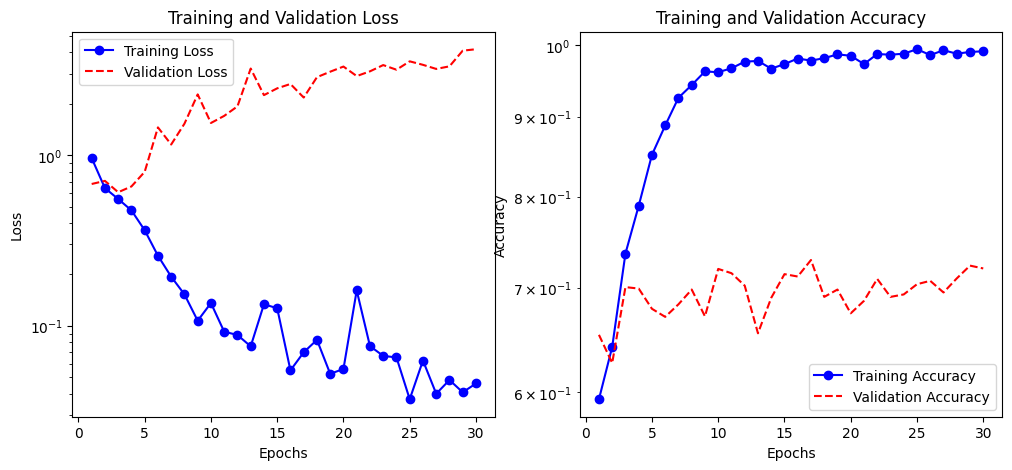

In [15]:
plot_network_outputs(history)